In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# read csv file

df=pd.read_csv('/content/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [ ]:
df.shape

(4653, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorial_columns = ['Gender', 'EverBenched', 'Education', 'City']

#Apply label encoding to each categorial column
for column in categorial_columns:
    df[column] = label_encoder.fit_transform(df[column])

x = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Make predictions on the test set
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.96%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.82      0.72      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



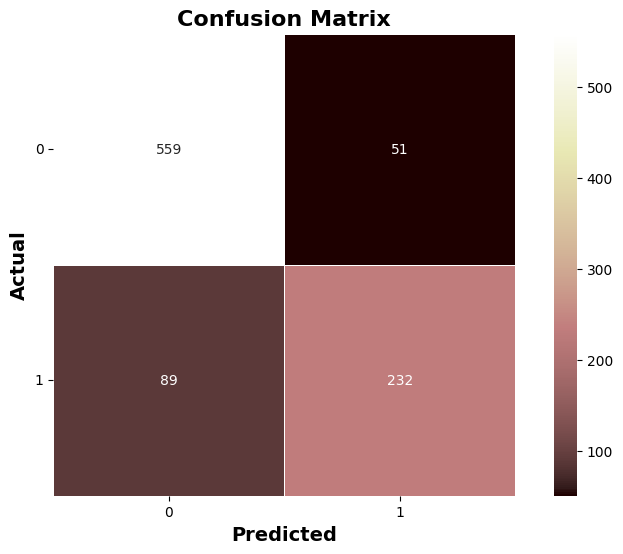

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='pink', linewidths=0.4, square=True, cbar=True,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"]
            )

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

In [ ]:
# Example of a model that may be underfitting
from sklearn.tree import DecisionTreeClassifier

#Assume X_train and y_train are your training features and labels
clf=DecisionTreeClassifier(max_depth=1)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
y_predict=clf.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.22%


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       610
           1       1.00      0.25      0.40       321

    accuracy                           0.74       931
   macro avg       0.86      0.63      0.62       931
weighted avg       0.81      0.74      0.69       931



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Train the classifier on the training data
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred1 = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.53%


In [ ]:
#importing SVM

from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear', random_state = 0)

model_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = model_svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.42%
